In [1]:
import zipfile

In [2]:
with zipfile.ZipFile("archive_4.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_files")

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

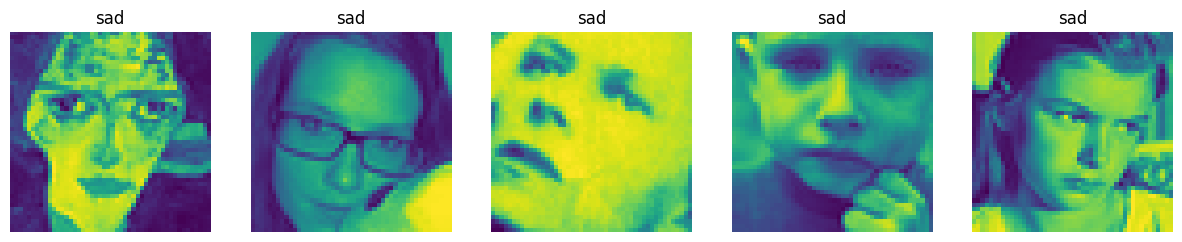

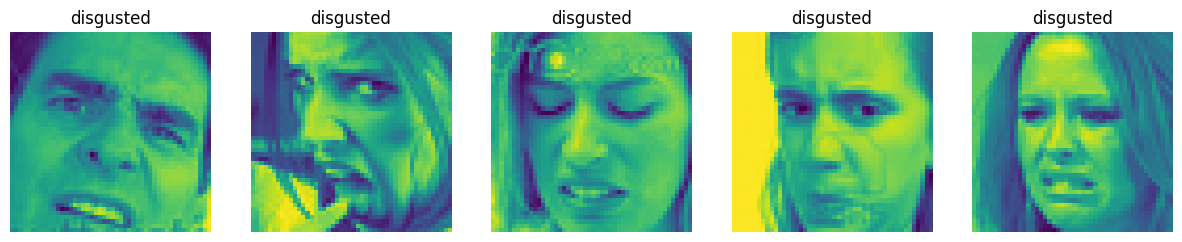

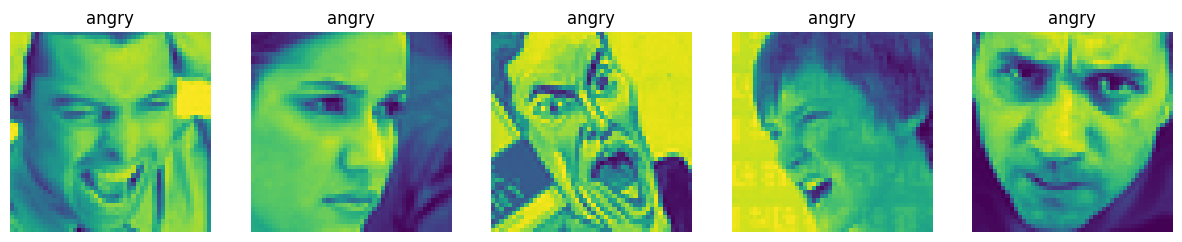

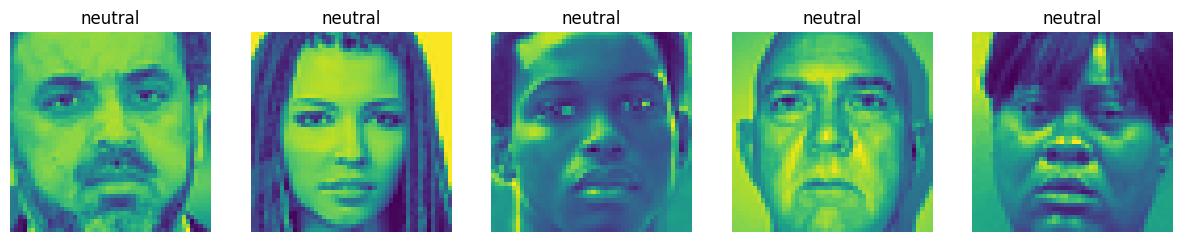

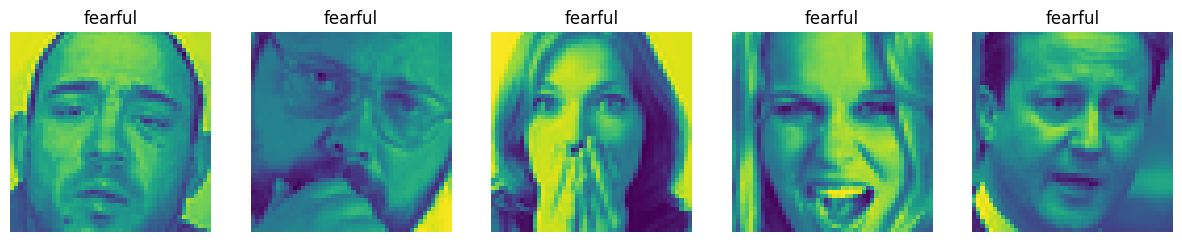

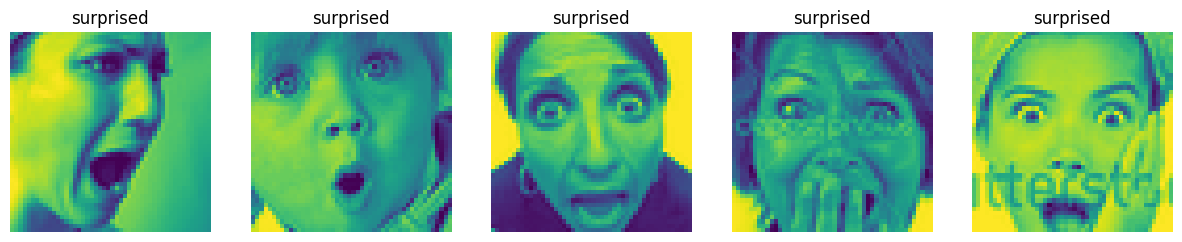

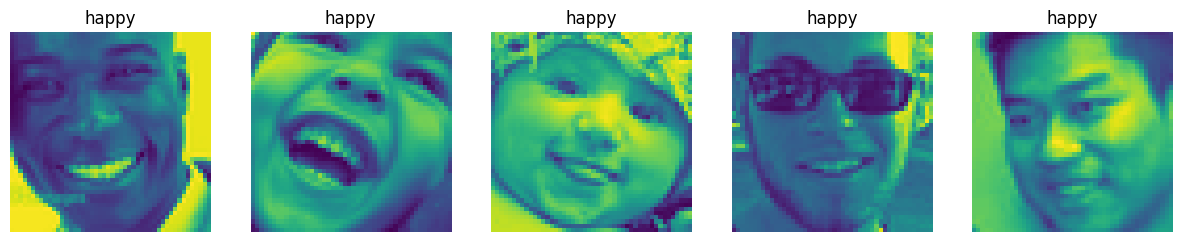

In [4]:
# Looking to random Training pictures

train_dir = "/content/extracted_files/train"
train_dir_classes = os.listdir(train_dir)

for classes in train_dir_classes:
  class_path = os.path.join(train_dir, classes)
  img_name = os.listdir(class_path)

  random5 = random.sample(img_name, 5)

  plt.figure(figsize=(15, 3))
  for index , img in enumerate(random5):
    img_complete_path = os.path.join(class_path, img)
    img = Image.open(img_complete_path)

    plt.subplot(1, 5, index+1)
    plt.imshow(img)
    plt.title(classes)
    plt.axis("off")
  plt.show()

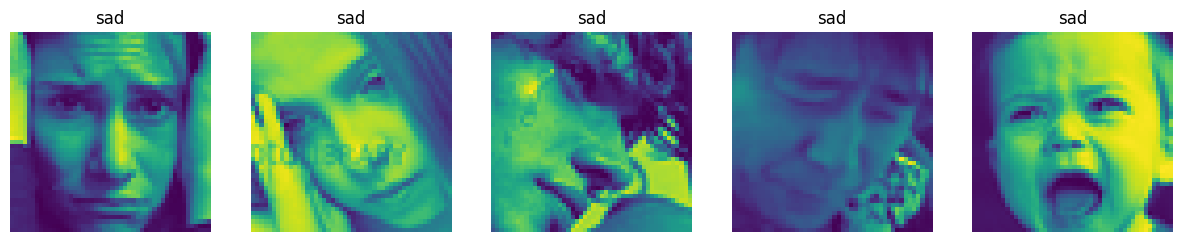

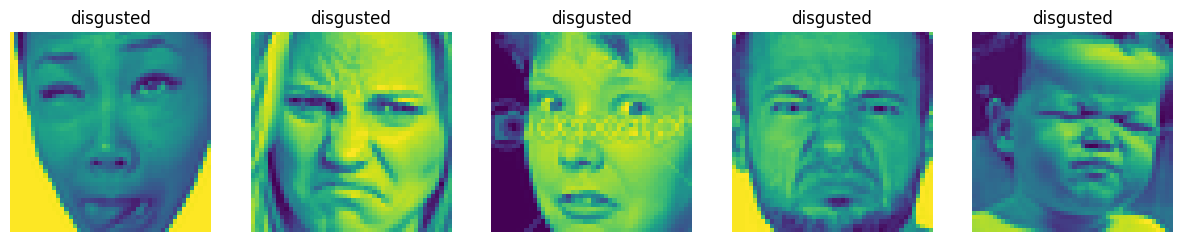

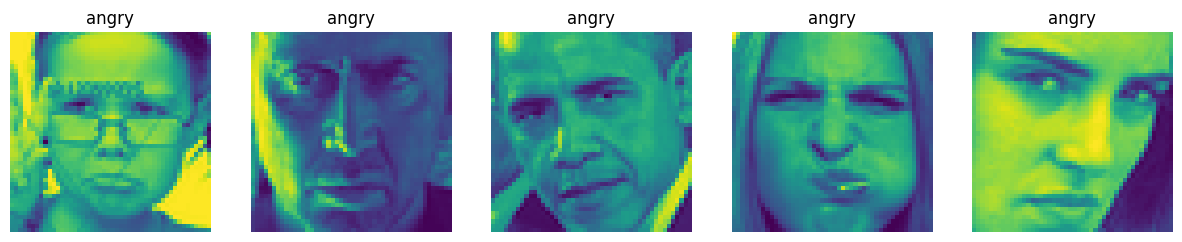

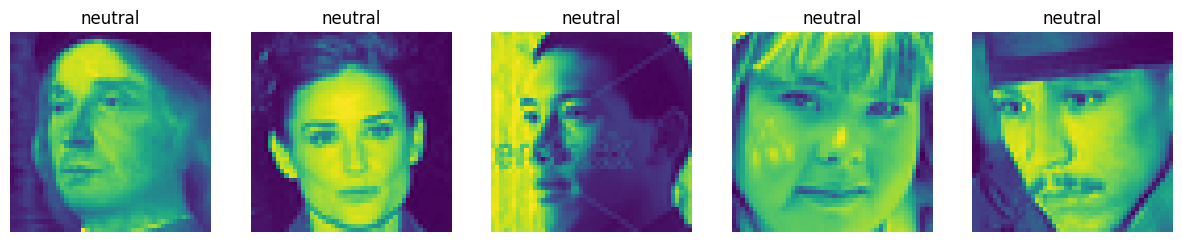

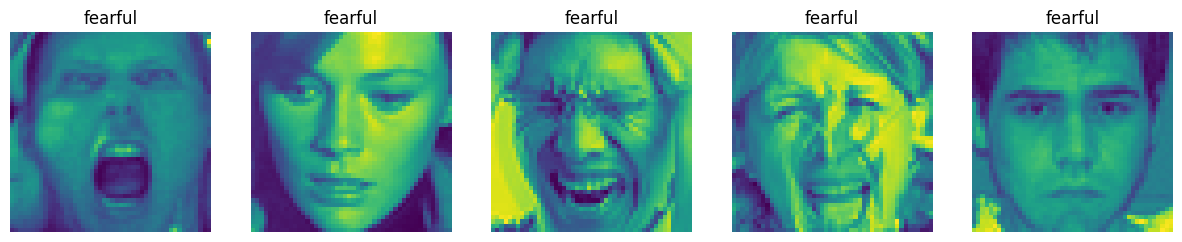

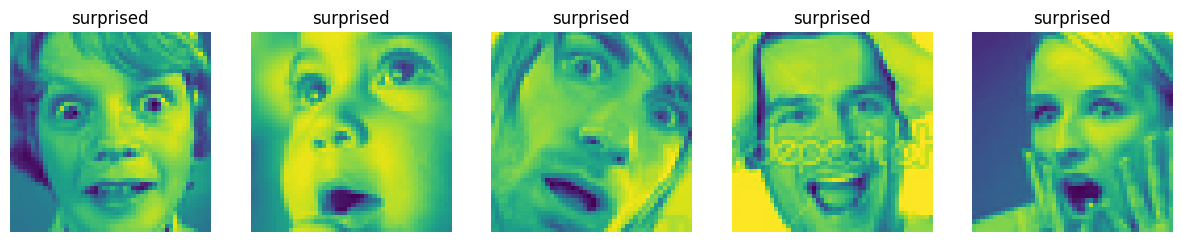

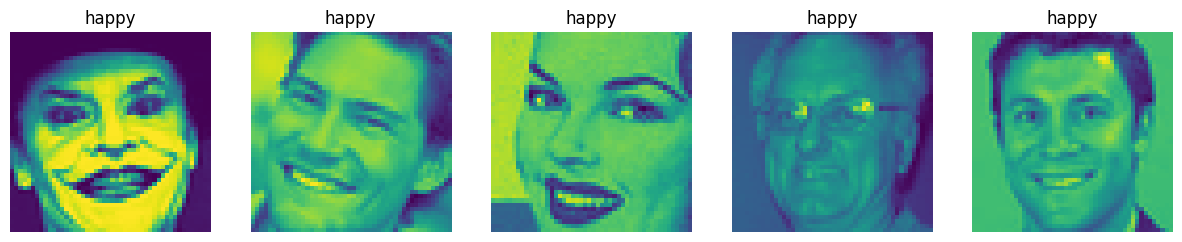

In [5]:
# Looking to random test pictures

test_dir = "/content/extracted_files/test"
test_dir_classes = os.listdir(test_dir)

for classes in test_dir_classes:
  class_path = os.path.join(test_dir, classes)
  img_name = os.listdir(class_path)

  random5 = random.sample(img_name, 5)

  plt.figure(figsize=(15, 3))
  for index , img in enumerate(random5):
    img_complete_path = os.path.join(class_path, img)
    img = Image.open(img_complete_path)

    plt.subplot(1, 5, index+1)
    plt.imshow(img)
    plt.title(classes)
    plt.axis("off")
  plt.show()

In [6]:
# Number of images in training folder

train_dir = "/content/extracted_files/train"
train_dir_classes = os.listdir(train_dir)

for classes in train_dir_classes:
  class_path = os.path.join(train_dir, classes)
  img_name = os.listdir(class_path)
  print(f"Number of images in {classes} is {len(img_name)}")

Number of images in sad is 4830
Number of images in disgusted is 436
Number of images in angry is 3995
Number of images in neutral is 4965
Number of images in fearful is 4097
Number of images in surprised is 3171
Number of images in happy is 7215


In [7]:
# Number of images in Test folder

test_dir = "/content/extracted_files/test"
test_dir_classes = os.listdir(test_dir)

for classes in test_dir_classes:
  class_path = os.path.join(test_dir, classes)
  img_name = os.listdir(class_path)
  print(f"Number of images in {classes} is {len(img_name)}")

Number of images in sad is 1247
Number of images in disgusted is 111
Number of images in angry is 958
Number of images in neutral is 1233
Number of images in fearful is 1024
Number of images in surprised is 831
Number of images in happy is 1774


# Now finding duplicate images

In [8]:
import hashlib

In [9]:
def hasher_images(image_path):
  hasher = hashlib.md5()
  with open(image_path, "rb") as f:
    img = f.read()
  hasher.update(img)
  return hasher.hexdigest()


duplicates = []
images = {}

for root , dir , files in os.walk("/content/extracted_files/train"):
  for file in files:
    img_path = os.path.join(root, file)
    hash_value = hasher_images(img_path)

    if hash_value in images:
      duplicates.append((hash_value , img_path))
    else:
      images[hash_value] = img_path

In [10]:
len(duplicates)

1236

In [11]:
len(images)

27473

# Now showing them using plt

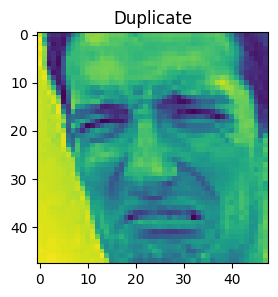

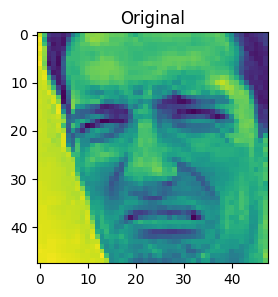

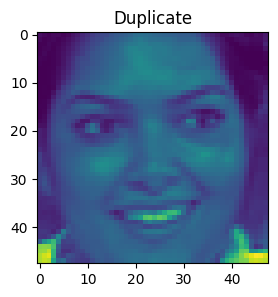

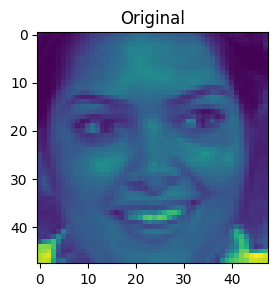

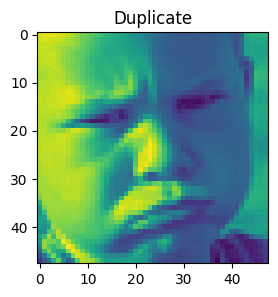

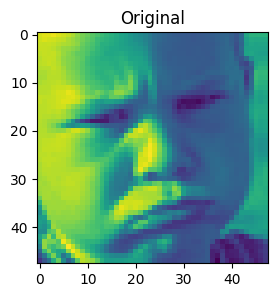

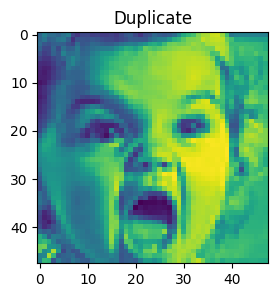

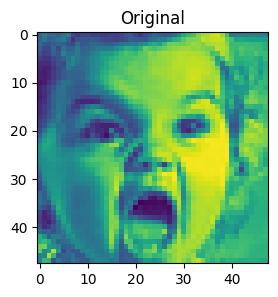

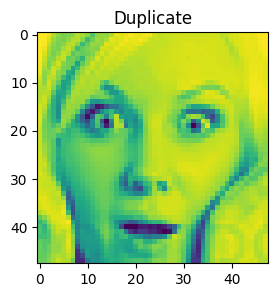

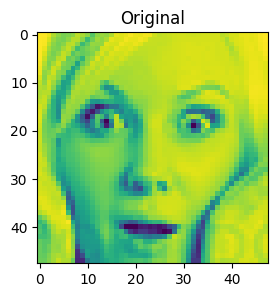

In [12]:
random_5 = random.sample(duplicates , 5)

for hash_value , img_path in random_5:
  duplicates_img_path = img_path
  original_img_path = images[hash_value]

  plt.figure(figsize=(8, 3))
  plt.subplot(1,2,1)
  duplicate_img = Image.open(duplicates_img_path)
  plt.imshow(duplicate_img)
  plt.title("Duplicate")

  plt.figure(figsize=(8, 3))
  plt.subplot(1,2,1)
  original_img = Image.open(original_img_path)
  plt.imshow(original_img)
  plt.title("Original")

  plt.show()

# Now checking if duplicate value is from same class or different

In [13]:
duplicate_different_class = 0

for hash_value , img_path in duplicates:
  duplicates_img_path = img_path
  original_img_path = images[hash_value]

  duplicates_img_class = os.path.split(duplicates_img_path)[0].split("/")[-1]
  original_img_class = os.path.split(original_img_path)[0].split("/")[-1]

  if duplicates_img_class != original_img_class:
    duplicate_different_class += 1
    print("Origianl Emotion: " , original_img_class)
    print("Duplicate Emotion: " , duplicates_img_class)

print(duplicate_different_class)

Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  angry
Origianl Emotion:  sad
Duplicate Emotion:  neutral
Origianl Emotion:  angry
Duplicate Emotion:  neutral
Origianl Emotion:  sad
Duplicate Emotion:  neutral
Origianl Emotion:  angry
Duplicate Emotion:  neutral
Origianl

# Removing Duplicates

In [14]:
for hash_value , img_path in duplicates:
  duplicates_img_path = img_path

  if os.path.exists(duplicates_img_path):
    try:
      os.remove(duplicates_img_path)
    except Exception as e:
      print("Error while removing" , e)

print("Duplicate images removed successfully")

Duplicate images removed successfully


# Running again to chech if now we have duplicates or not

In [15]:
def hasher_images(image_path):
  hasher = hashlib.md5()
  with open(image_path, "rb") as f:
    img = f.read()
  hasher.update(img)
  return hasher.hexdigest()


duplicates = []
images = {}

for root , dir , files in os.walk("/content/extracted_files/train"):
  for file in files:
    img_path = os.path.join(root, file)
    hash_value = hasher_images(img_path)

    if hash_value in images:
      duplicates.append((hash_value , img_path))
    else:
      images[hash_value] = img_path

len(duplicates)

0

# Now finding curropt images

In [16]:
for root , dir , files in os.walk("/content/extracted_files/train"):
  for file in files:
    img_path = os.path.join(root, file)
    try:
      with open(img_path, "rb") as f:
        img = Image.open(f)
        img.verify()
    except Exception as e:
      print("error" , e)
      print(img_path)

print("Curropt images checked")

Curropt images checked


# Now checking the size of pixels. Are they different?  for detecting outliers


In [17]:
for root , dir , files in os.walk("/content/extracted_files/train"):
  unique_img_pixel_size = []

  for file in files:
    img_path = os.path.join(root, file)

    try:
      with open(img_path, "rb") as f:
        image = Image.open(img_path)
        image_size = image.size

      if image_size not in unique_img_pixel_size:
        unique_img_pixel_size.append(image_size)
    except Exception as e:
      print("error" , e)
      print(img_path)

print(unique_img_pixel_size)

[(48, 48)]


# Now Checking size of images. for detecting outliers

In [18]:
for root , dir , files in os.walk("/content/extracted_files/train"):
  unique_img_size = []

  for file in files:
    img_path = os.path.join(root, file)

    try:
      with open(img_path, "rb") as f:
        image = os.path.getsize(img_path)/1024
        kb_file_size = round(image, 2)

        unique_img_size.append(kb_file_size)

    except Exception as e:
      print("error" , e)

print(sorted(unique_img_size))

[0.6, 0.75, 0.88, 0.88, 0.88, 0.9, 0.92, 0.97, 0.99, 1.07, 1.16, 1.2, 1.21, 1.21, 1.22, 1.22, 1.22, 1.24, 1.27, 1.28, 1.28, 1.28, 1.29, 1.29, 1.29, 1.3, 1.3, 1.31, 1.31, 1.31, 1.32, 1.32, 1.34, 1.34, 1.34, 1.34, 1.34, 1.35, 1.35, 1.36, 1.36, 1.36, 1.36, 1.36, 1.36, 1.36, 1.36, 1.36, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.39, 1.39, 1.39, 1.39, 1.39, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.43, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 

# Size also don't have that much difference so there is no outlier here

# Now Model Building

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential


In [85]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/extracted_files/train",
    labels = "inferred",
    label_mode = 'int',
    image_size = (48, 48),
    class_names = None,
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = True

)

Found 27473 files belonging to 7 classes.


In [86]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/extracted_files/test",
    labels = "inferred",
    label_mode = 'int',
    image_size = (48, 48),
    class_names = None,
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = True

)

Found 7178 files belonging to 7 classes.


In [87]:
# Now Normalizing our data

# def process(image , label):
#   image = tf.cast(image/255. , tf.float32)
#   return image , label

# train_ds = train_ds.map(process)
# test_ds = test_ds.map(process)

In [88]:
# model = Sequential()

# model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(48, 48, 1)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


# model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


# model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(7, activation='softmax'))

In [89]:
from tensorflow.keras.layers import Input, Rescaling, RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D

In [90]:
model = Sequential([
    Input(shape=(48, 48, 1)),

    # data augmintation
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomZoom(0.1),
    RandomRotation(0.1),

    # Set 1 NN
    Conv2D(64 , (3, 3) , padding='same' , activation='relu'),
    BatchNormalization(),
    Conv2D(64 , (3, 3) , padding='same' , activation='relu'),

    Conv2D(64 , (3, 3) , padding='same' , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    # Set 2 NN
    Conv2D(128 , (3, 3) , padding='same' , activation='relu'),
    BatchNormalization(),
    Conv2D(128 , (3, 3) , padding='same' , activation='relu'),

    Conv2D(128 , (3, 3) , padding='same' , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(256 , (3, 3) , padding='same' , activation='relu'),
    BatchNormalization(),
    Conv2D(256 , (3, 3) , padding='same' , activation='relu'),

    Conv2D(256 , (3, 3) , padding='same' , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    # Dense layer
    GlobalAveragePooling2D(),

    Dense(256 , activation='relu'),
    Dense(128 , activation='relu'),

    # Last Dense
    Dense(7 , activation='softmax')

])

In [91]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_5 (RandomFlip)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_5 (RandomZoom)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_5               │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             

 Total params: 2,020,231 (7.71 MB)

 Trainable params: 2,019,335 (7.70 MB)

 Non-trainable params: 896 (3.50 KB)

In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint(
#         "emotion_model.keras",
#         monitor="val_accuracy",
#         save_best_only=True,
#         verbose=1,
#         save_weights_only=False,
#         mode='auto',
#         save_freq='epoch',
#         initial_value_threshold=None,
#     ),

#     tf.keras.callbacks.EarlyStopping(
#         monitor="val_accuracy",
#         min_delta=0.1,
#         patience=5,
#         verbose=1,
#         mode="auto",
#         baseline=None,
#         restore_best_weights=True,
#         start_from_epoch=0,

#     ),

#     tf.keras.callbacks.ReduceLROnPlateau(
#         monitor="val_accuracy",
#         factor=0.5,
#         patience=5,
#         verbose=1,
#         mode="auto",
#         )
# ]

In [104]:
model.fit(train_ds , validation_data=test_ds , epochs=20)

Epoch 1/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.5209 - loss: 1.2418 - val_accuracy: 0.5534 - val_loss: 1.1584
Epoch 2/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.5439 - loss: 1.1980 - val_accuracy: 0.5568 - val_loss: 1.1556
Epoch 3/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.5547 - loss: 1.1712 - val_accuracy: 0.5724 - val_loss: 1.1323
Epoch 4/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5653 - loss: 1.1379 - val_accuracy: 0.5748 - val_loss: 1.1147
Epoch 5/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.5797 - loss: 1.1144 - val_accuracy: 0.5807 - val_loss: 1.1017
Epoch 6/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.5868 - loss: 1.1003 - val_accuracy: 0.5822 - val_loss: 1.0975
Epoch 7/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5921 - loss: 1.0857 - val_accuracy: 0.5945 - val_loss: 1.0736
Epoch 8/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5992 - loss: 1.0600 - 

In [105]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/extracted_files/test",
    labels = "inferred",
    label_mode = 'int',
    image_size = (48, 48),
    class_names = None,
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle = True,
)

Found 7178 files belonging to 7 classes.


In [106]:
y_true = []
y_pred = []

In [107]:
for image , label in val_ds:
  pred = model.predict(image)
  y_pred.extend(tf.argmax(pred , axis=1).numpy())
  y_true.extend(label.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [109]:
class_name = ['angry' , 'disgusted' , 'fear' , 'happy' , 'neutral' , 'sad' , 'surprised']
print(classification_report(y_true , y_pred , target_names=class_name))

              precision    recall  f1-score   support

       angry       0.49      0.63      0.55       958
   disgusted       0.58      0.06      0.11       111
        fear       0.48      0.35      0.41      1024
       happy       0.90      0.82      0.86      1774
     neutral       0.56      0.65      0.60      1233
         sad       0.52      0.50      0.51      1247
   surprised       0.72      0.79      0.75       831

    accuracy                           0.63      7178
   macro avg       0.61      0.54      0.54      7178
weighted avg       0.63      0.63      0.62      7178



In [110]:
cm = confusion_matrix(y_true , y_pred)
cm

array([[ 603,    1,   80,   18,  100,  129,   27],
       [  69,    7,   12,    1,    3,   18,    1],
       [ 178,    2,  361,   19,  134,  199,  131],
       [  79,    0,   31, 1463,  117,   48,   36],
       [ 102,    0,   63,   56,  807,  166,   39],
       [ 177,    1,  121,   34,  269,  620,   25],
       [  33,    1,   79,   33,   15,   13,  657]])

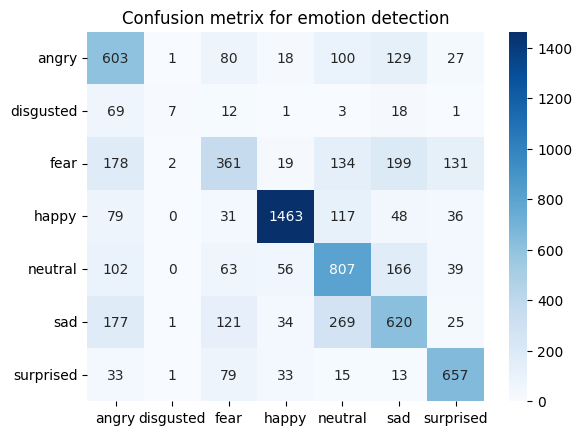

In [111]:
sns.heatmap(cm , annot=True , cmap='Blues' , fmt='d' , xticklabels=class_name , yticklabels=class_name)
plt.title("Confusion metrix for emotion detection")
plt.show()

In [112]:
model.save("emotion_detection.keras")